In [ ]:
#Import packages
import numpy as np


import pandas as pd


import matplotlib.pyplot as plt


import sklearn


In [ ]:
# loads the emissions dataset into memory
df_cars = pd.read_csv('/content/cardata.csv', header=None)

# adds headers to the dataset according to documentation
df_cars.columns = [
    'Manufacturer', 'Model', 'Fuel Type', 'Engine Power (Kw)', 'Engine Cpacity',
    'Emissions CO [mg/km]', 'THC Emissions [mg/km]', 'Emissions NOx [mg/km]']

# Remove headers in the first column of data
df_cars = df_cars.drop(0, axis=0)

# prints info
print('Data shape:', df_cars.shape)

# first 5 samples
df_cars.head(10)

Data shape: (4452, 8)


,Manufacturer,Model,Fuel Type,Engine Power (Kw),Engine Cpacity,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km]
1,ABARTH,595 MY22,Petrol,121,1368,688,66,28
2,ABARTH,595 MY22,Petrol,121,1368,688,66,28
3,ABARTH,595 MY22,Petrol,121,1368,688,66,28
4,ABARTH,595 MY22,Petrol,121,1368,688,66,28
5,ABARTH,595 MY22,Petrol,121,1368,688,66,28
6,ABARTH,595 MY22,Petrol,121,1368,688,66,28
7,ABARTH,595 MY22,Petrol,121,1368,688,66,28
8,ABARTH,595 MY22,Petrol,121,1368,688,66,28
9,ABARTH,595 MY22,Petrol,121,1368,688,66,28
10,ABARTH,595 MY22,Petrol,121,1368,688,66,28


In [ ]:
# data partition using sklearn
from sklearn.model_selection import train_test_split

#Remove any cars from data which are not petrol, we are only interested in
#petrol car emissions
df_cars_filtered = df_cars[df_cars['Fuel Type'] == 'Petrol']
#Potentially focus on specific car manufacturersd
#df_cars_filtered = df_cars_filtered[df_cars['Manufacturer'] == 'JAGUAR']


# separation into data (X) and respective labels (y)
X, y = df_cars_filtered.iloc[:, 3].values.astype('float'), df_cars_filtered.iloc[:, 5].values.astype('float')

print('First 10 Engine power values:\n', X[:10], X.shape)
print('First 10 CO emission values:\n', y[:10])
print()
#Try pulling models from specific manufacturers
# data split
#train_data, test_data = train_test_split(df_cars, test_size=0.2, random_state=42)
train_data, test_data, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train info
print('Train data shape:', train_data.shape, train_data.dtype)

First 10 Engine power values:
 [121. 121. 121. 121. 121. 121. 121. 121. 121. 121.] (1581,)
First 10 CO emission values:
 [688. 688. 688. 688. 688. 688. 688. 688. 688. 688.]

Train data shape: (1264,) float64


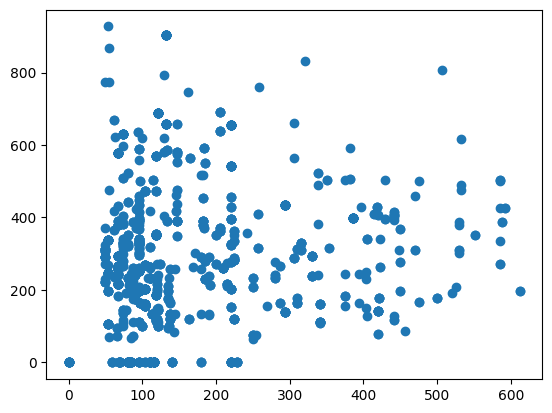

In [ ]:
#Scatterplot of preprocessed data
import matplotlib.pyplot as plt
plt.scatter(train_data, y_train)
plt.show()

theta_0: 264.0724366315656
theta_1: 0.16887321227703203
MSE: 37904.58657498686


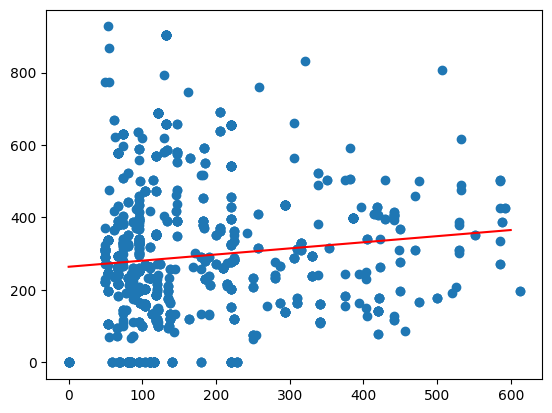

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Fit the model to the data
model.fit(train_data.reshape(-1, 1), y_train)

# Get the coefficients (thetas)
theta_0 = model.intercept_
theta_1 = model.coef_[0]

# Print thetas
print('theta_0:', theta_0)
print('theta_1:', theta_1)

y_predict = model.predict(test_data.reshape(-1, 1))

mse = mean_squared_error(y_test, y_predict)
print('MSE:', mse)

x_pred = np.array([[0], [600]])
y_pred = theta_0 + theta_1 * x_pred
plt.scatter(train_data, y_train)
plt.plot(x_pred, y_pred, '-r')
plt.show()


In [ ]:
# predicts a y value for a given x
x_pred = float(input('Provide a value for x: '))
y_pred = theta_0 + theta_1 * x_pred

print('new x:', x_pred)
print('predicted y:', y_pred)

# Get the coefficients (thetas)
theta_0 = model.intercept_
theta_1 = model.coef_[0]

# Print thetas
print('theta_0:', theta_0)
print('theta_1:', theta_1)

mse = mean_squared_error(y_test, y_predict)
print('MSE:', mse)



Provide a value for x: 100
new x: 100.0
predicted y: 280.9597578592688
theta_0: 264.0724366315656
theta_1: 0.16887321227703203
MSE: 37904.58657498686


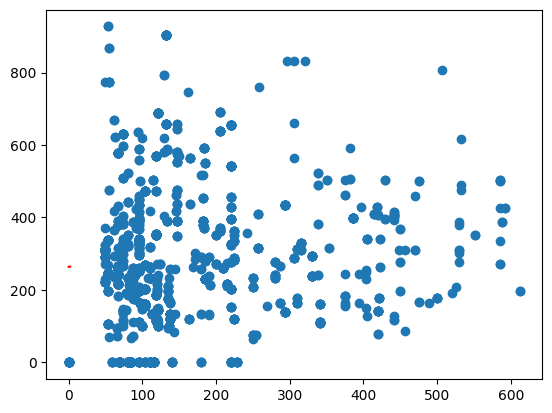

In [ ]:
# plots the obtained hypothesis
x_pred = np.array([[0], [2]])
y_pred = theta_0 + theta_1 * x_pred
X = X.reshape(-1,)
Y = y.reshape(-1,)

plt.scatter(X, Y)
plt.plot(x_pred, y_pred, '-r')
plt.show()

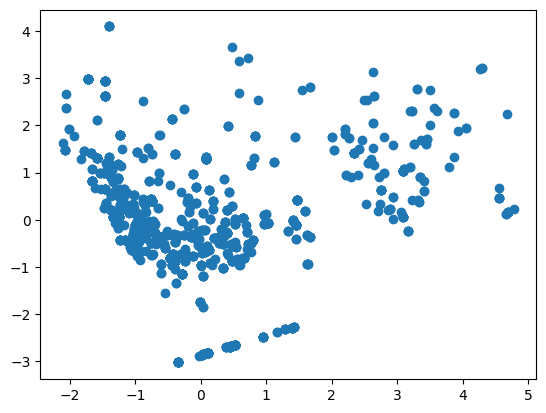

In [ ]:
#PCA
#Data standardization with StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
scaler = StandardScaler()
X = df_cars_filtered.iloc[:, 3:].values.astype('float')
Y = df_cars_filtered.iloc[:, 5].values.astype('float')

# Handle missing values by selecting the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#Train/test split for new model
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.2, random_state=666)
# normalize
norm_X_train = scaler.fit_transform(X_train)

#Sklearn PCA Implementation
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca_2d_X = pca.fit_transform(norm_X_train)
#Data projection
plt.scatter(pca_2d_X[:, 0], pca_2d_X[:, 1])
plt.show()

In [ ]:
#New model based on PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('pca', PCA(n_components=2)),  # PCA for dimensionality reduction
    ('model', LinearRegression())  # LinearRegression expected to be best model
])

# Train the model
pipeline.fit( X_train, Y_train)

# Evaluate the model
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

#Make predictions to calculate MSE
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
# Calculate Mean Squared Error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training R^2 Score:", train_score)
print("Training MSE:", train_mse)
print("Testing R^2 Score:", test_score)
print("Testing MSE:", test_mse)

Training R^2 Score: -60339.56912488063
Training MSE: 2151474218.5552955
Testing R^2 Score: -52844.74838861497
Testing MSE: 2024187106.032445
